In [1]:
import random 
import matplotlib.pyplot as plt
def load_dataset(dataset): # process the dataset
    new_data = []
    for i in range(len(dataset)):
        ex, attributes = dataset[i].split(" ", 1)
        new_data.append(attributes)
    return new_data

def change_type(dataset): # change string to int
    int_data = list()
    for i in range(len(dataset)):
        Object = []
        for a in range(len(dataset[i])):
                if dataset[i][a] == "1":
                    Object.append(1)
                elif dataset[i][a] == "0":
                    Object.append(0)
        int_data.append(Object)
    return int_data
def process_label(row): # determine if the object is positive or not (numbers of 1 >= 3)
    labels = []
    for i in range(len(row)):
        num = 0
        pos = False
        for a in range(len(row[i])):
            if row[i][a]=="1":
                num = num + 1
            if num >= 3:
                row[i] += "1"
                pos = True
                break
        if pos==False:
            row[i] += "0" # add the labels directly ibto dataset instead of another list
    return 0

def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i+1] * row[i]
    return 1.0 if activation >= 10e-7 else 0.0

def train_weights(train, learning_rate, n_epoch):
    zero_error_epoch = 0
    weights = [0.2 for i in range(len(train[-1]))]
    record = False
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction #list indices must be integers or slices, not list
            #print(error)
            sum_error += error**2 # get the abs of -1 1 0
            weights[0] = weights[0] + learning_rate * error
            for i in range(len(row)-1):
                weights[i+1] = weights[i+1] + learning_rate * error * row[i]
                #print(weights[i+1])
        
        if sum_error == 0 and record == False:
            print("sss")
            zero_error_epoch = epoch + 1
            record = True
        #print('>epoch=%d, learning_rate=%.3f, error=%.3f' % (epoch, learning_rate, sum_error))
        print(weights[0], weights[1],weights[2] ,weights[3],weights[4], weights[5])

    return weights, zero_error_epoch * len(train) #, example_presentations

def draw_func(learning_rate, example_pres):
    plt.plot(learning_rate, example_pres, 'ro')
    plt.ylabel('Number of example-presentations')
    plt.xlabel('Learning rate')
    plt.axis([0, 1, 0, 300])
    plt.show()
    

In [2]:
filename = 'hw3_dataset.txt'
f = open(filename, "r")
lines = f.readlines()
dataset = list(lines)
new_data = load_dataset(dataset)
#print(new_data)
process_label(new_data)
new_int_data = change_type(new_data)
example_pres = []

In [3]:
weights = []
learning_rate = 0.2
n_epoch = 20
weights ,example_presentations = train_weights(new_int_data, learning_rate, n_epoch)
example_pres.append(example_presentations)
print(weights)
print(new_int_data)
print("----------Leanring rate: 0.2----------")
print("Example-presentations:%d "% example_presentations)

-0.4 0.2 0.2 0.2 -0.2 0.2
-0.4000000000000001 0.4 0.4 0.4000000000000001 0.0 0.4
-0.6000000000000001 0.4 0.4 0.6000000000000001 0.0 0.2
-0.8 0.4000000000000001 0.2 0.6000000000000001 0.0 0.4000000000000001
-1.0 0.4000000000000001 0.4 0.4000000000000001 0.0 0.6000000000000001
-1.0 0.6000000000000001 0.6000000000000001 0.6000000000000001 0.2 0.4000000000000001
-1.0 0.4000000000000001 0.6000000000000001 0.6000000000000001 0.4 0.6000000000000001
-1.2 0.6000000000000001 0.4000000000000001 0.4000000000000001 0.4000000000000001 0.6000000000000001
-1.2 0.6000000000000001 0.4000000000000001 0.6000000000000001 0.4000000000000001 0.6000000000000001
sss
-1.2 0.6000000000000001 0.4000000000000001 0.6000000000000001 0.4000000000000001 0.6000000000000001
-1.2 0.6000000000000001 0.4000000000000001 0.6000000000000001 0.4000000000000001 0.6000000000000001
-1.2 0.6000000000000001 0.4000000000000001 0.6000000000000001 0.4000000000000001 0.6000000000000001
-1.2 0.6000000000000001 0.4000000000000001 0.60000

In [4]:
learning_rate = 0.4
n_epoch = 20
weights ,example_presentations = train_weights(new_int_data, learning_rate, n_epoch)
example_pres.append(example_presentations)
print(weights)
print(new_int_data)
print("----------Leanring rate: 0.4----------")
print("Example-presentations:%d "% example_presentations)

-0.6000000000000001 0.2 0.6000000000000001 0.20000000000000007 -0.6000000000000001 0.6
-0.9999999999999999 0.20000000000000007 0.6 0.6 -0.20000000000000007 1.0
-1.4 0.20000000000000007 0.6 1.0 -0.20000000000000007 0.9999999999999999
-1.4 1.0 0.6 1.0 0.19999999999999996 0.9999999999999999
-1.7999999999999998 1.0 1.0 0.9999999999999999 0.19999999999999996 0.5999999999999999
-2.1999999999999997 0.9999999999999999 0.6 0.9999999999999999 0.19999999999999996 0.9999999999999999
-2.1999999999999997 0.9999999999999999 1.4 1.4 0.19999999999999996 0.9999999999999999
-2.1999999999999997 1.4 1.4 1.4 0.6 1.4
-2.5999999999999996 1.4 1.4 1.4 0.6 0.9999999999999999
-2.5999999999999996 0.9999999999999999 1.4 1.4 1.0 1.4
-2.9999999999999996 1.4 0.9999999999999999 0.9999999999999999 0.9999999999999999 1.4
-2.9999999999999996 1.4 0.9999999999999999 1.4 0.9999999999999999 1.4
sss
-2.9999999999999996 1.4 0.9999999999999999 1.4 0.9999999999999999 1.4
-2.9999999999999996 1.4 0.9999999999999999 1.4 0.9999999999

In [5]:
weights = []
learning_rate = 0.6
n_epoch = 20
weights ,example_presentations = train_weights(new_int_data, learning_rate, n_epoch)
example_pres.append(example_presentations)
print(weights)
print("----------Leanring rate: 0.6----------")
print("Example-presentations:%d "% example_presentations)

-0.39999999999999997 0.2 0.2 0.2 0.2 0.2
sss
-0.39999999999999997 0.2 0.2 0.2 0.2 0.2
-0.39999999999999997 0.2 0.2 0.2 0.2 0.2
-0.39999999999999997 0.2 0.2 0.2 0.2 0.2
-0.39999999999999997 0.2 0.2 0.2 0.2 0.2
-0.39999999999999997 0.2 0.2 0.2 0.2 0.2
-0.39999999999999997 0.2 0.2 0.2 0.2 0.2
-0.39999999999999997 0.2 0.2 0.2 0.2 0.2
-0.39999999999999997 0.2 0.2 0.2 0.2 0.2
-0.39999999999999997 0.2 0.2 0.2 0.2 0.2
-0.39999999999999997 0.2 0.2 0.2 0.2 0.2
-0.39999999999999997 0.2 0.2 0.2 0.2 0.2
-0.39999999999999997 0.2 0.2 0.2 0.2 0.2
-0.39999999999999997 0.2 0.2 0.2 0.2 0.2
-0.39999999999999997 0.2 0.2 0.2 0.2 0.2
-0.39999999999999997 0.2 0.2 0.2 0.2 0.2
-0.39999999999999997 0.2 0.2 0.2 0.2 0.2
-0.39999999999999997 0.2 0.2 0.2 0.2 0.2
-0.39999999999999997 0.2 0.2 0.2 0.2 0.2
-0.39999999999999997 0.2 0.2 0.2 0.2 0.2
[-0.39999999999999997, 0.2, 0.2, 0.2, 0.2, 0.2]
----------Leanring rate: 0.6----------
Example-presentations:40 


In [6]:
weights = []
learning_rate = 0.8
n_epoch = 20
weights ,example_presentations = train_weights(new_int_data, learning_rate, n_epoch)
example_pres.append(example_presentations)
print(weights)
print("----------Leanring rate: 0.8----------")
print("Example-presentations:%d "% example_presentations)

-1.4000000000000001 1.0 1.0 0.19999999999999996 -0.6000000000000001 0.19999999999999996
-2.2 1.0 1.0 1.0 0.19999999999999996 1.0
-3.0 1.0 1.0 1.8 0.19999999999999996 1.0
-3.0 1.8 1.8 2.6 0.19999999999999996 1.0
-3.8 1.8 1.0 2.6 0.19999999999999996 1.8
-4.6 1.8 1.8 1.8 0.19999999999999996 2.6000000000000005
-4.6 2.6 2.6 2.6 1.0 1.8000000000000005
-4.6 1.8 2.6 2.6 1.8 2.6000000000000005
-5.3999999999999995 2.6 1.8 1.8 1.8 2.6000000000000005
-5.3999999999999995 2.6 1.8 2.6 1.8 2.6000000000000005
sss
-5.3999999999999995 2.6 1.8 2.6 1.8 2.6000000000000005
-5.3999999999999995 2.6 1.8 2.6 1.8 2.6000000000000005
-5.3999999999999995 2.6 1.8 2.6 1.8 2.6000000000000005
-5.3999999999999995 2.6 1.8 2.6 1.8 2.6000000000000005
-5.3999999999999995 2.6 1.8 2.6 1.8 2.6000000000000005
-5.3999999999999995 2.6 1.8 2.6 1.8 2.6000000000000005
-5.3999999999999995 2.6 1.8 2.6 1.8 2.6000000000000005
-5.3999999999999995 2.6 1.8 2.6 1.8 2.6000000000000005
-5.3999999999999995 2.6 1.8 2.6 1.8 2.6000000000000005
-5.

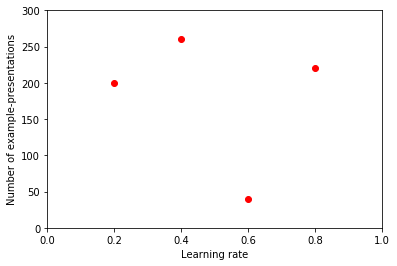

In [7]:
draw_func([0.2, 0.4, 0.6, 0.8], example_pres)